<a href="https://colab.research.google.com/github/doommodery/neural/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [ ]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [ ]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


Нормализация входных данных

In [ ]:
from tensorflow import keras

train_X = trainX / 255
test_X = testX / 255

train_Y = keras.utils.to_categorical(trainy, 10) # Перобразование в OneHot Encoding
test_Y = keras.utils.to_categorical(testy, 10) # Перобразование в OneHot Encoding

train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

print(train_X.shape)
print(test_X.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
print(train_Y)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 1.3. Визуализируем часть данных из датасета

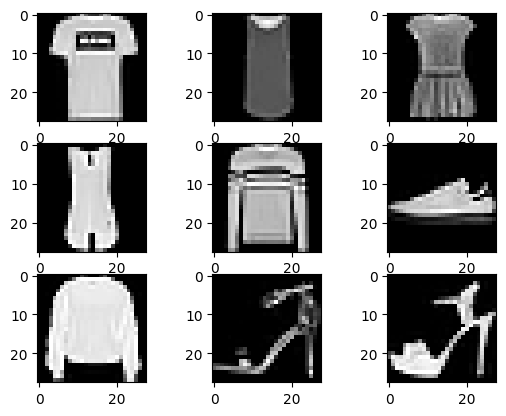

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [ ]:
# Ваш код
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

## 1.5. Обучаем модель

In [ ]:
# Ваш код
EPOCH = 3

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


history = model.fit(train_X, train_Y, batch_size=50, epochs=EPOCH, validation_split=0.2)

Epoch 1/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7757 - loss: 0.6258 - val_accuracy: 0.8821 - val_loss: 0.3340
Epoch 2/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8953 - loss: 0.2934 - val_accuracy: 0.9002 - val_loss: 0.2783
Epoch 3/3
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9110 - loss: 0.2449 - val_accuracy: 0.9065 - val_loss: 0.2543


## 1.6. Анализируем обученную модель. Строим график (графики) обучения

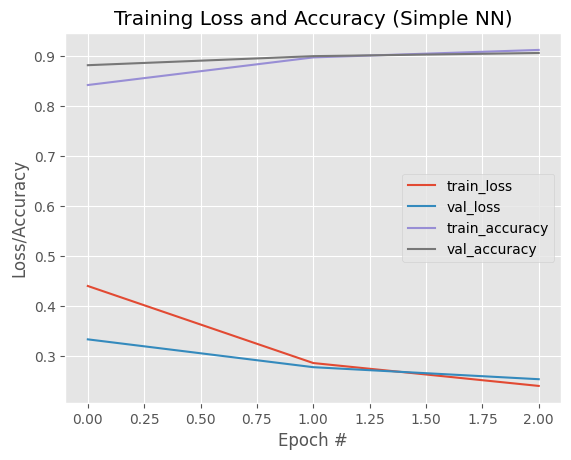

In [ ]:
# Ваш код
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [ ]:
from sklearn.preprocessing import LabelBinarizer
from keras.models import load_model
import pickle

model.save('model_fashion.keras')

labels = LabelBinarizer()
labels.fit_transform(train_Y)

with open('labels_fashion', 'wb') as f:
  f.write(pickle.dumps(labels))

print(labels.classes_)

[0 1 2 3 4 5 6 7 8 9]


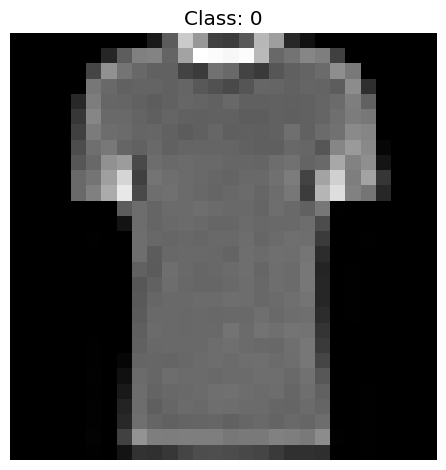

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
Class	Prediction
0	0.98629
1	0.00001
2	0.00170
3	0.00178
4	0.00001
5	0.00000
6	0.01018
7	0.00000
8	0.00003
9	0.00000
Result of prediction: 0



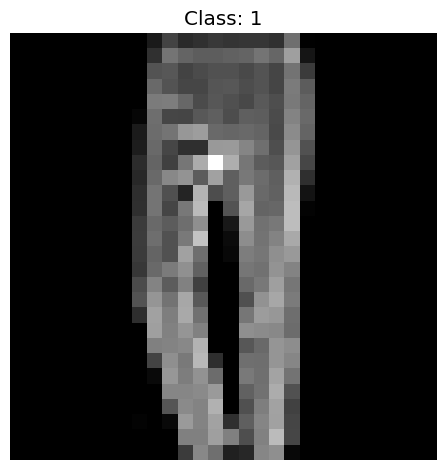

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
Class	Prediction
0	0.00116
1	0.99667
2	0.00003
3	0.00182
4	0.00007
5	0.00000
6	0.00022
7	0.00001
8	0.00002
9	0.00000
Result of prediction: 1



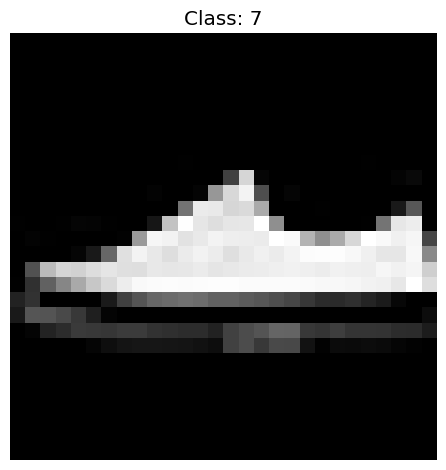

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Class	Prediction
0	0.00000
1	0.00000
2	0.00000
3	0.00000
4	0.00000
5	0.00017
6	0.00000
7	0.99968
8	0.00000
9	0.00014
Result of prediction: 7



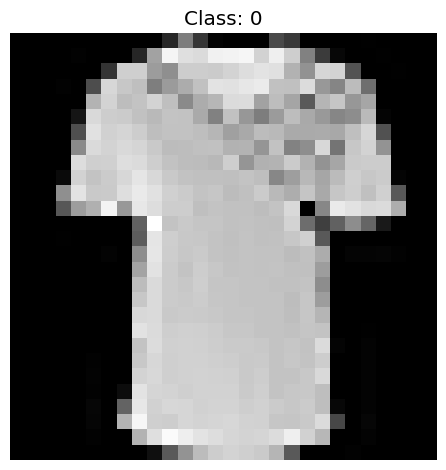

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Class	Prediction
0	0.95528
1	0.00000
2	0.00103
3	0.00243
4	0.00002
5	0.00000
6	0.04116
7	0.00000
8	0.00007
9	0.00000
Result of prediction: 0



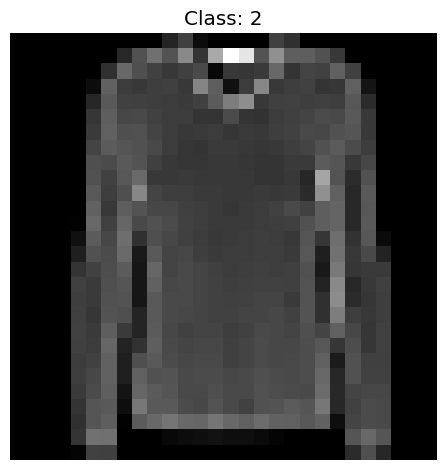

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
Class	Prediction
0	0.01331
1	0.00015
2	0.60859
3	0.00096
4	0.01751
5	0.00002
6	0.35929
7	0.00001
8	0.00006
9	0.00009
Result of prediction: 2



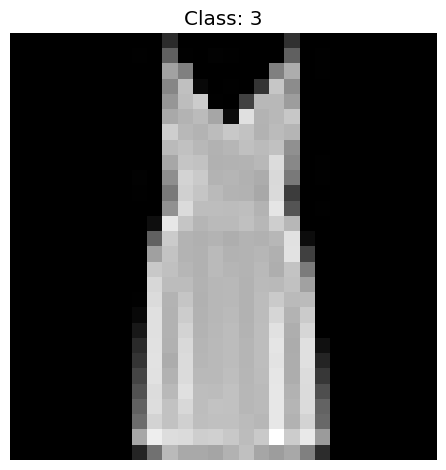

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Class	Prediction
0	0.00185
1	0.00017
2	0.00000
3	0.99688
4	0.00000
5	0.00000
6	0.00109
7	0.00000
8	0.00000
9	0.00000
Result of prediction: 3



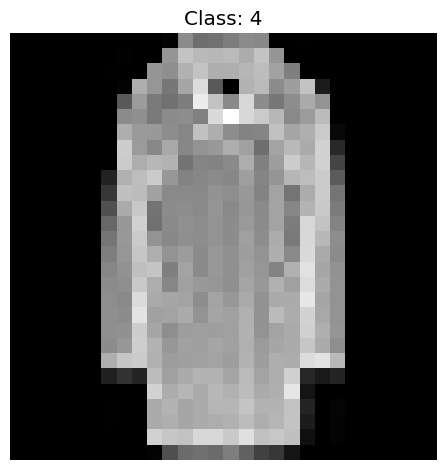

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
Class	Prediction
0	0.00514
1	0.00024
2	0.01845
3	0.21718
4	0.73619
5	0.00001
6	0.02164
7	0.00002
8	0.00106
9	0.00008
Result of prediction: 4



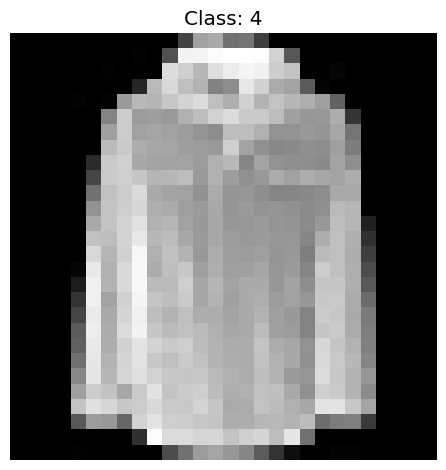

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
Class	Prediction
0	0.00026
1	0.00009
2	0.00490
3	0.00056
4	0.97664
5	0.00000
6	0.01712
7	0.00000
8	0.00040
9	0.00004
Result of prediction: 4



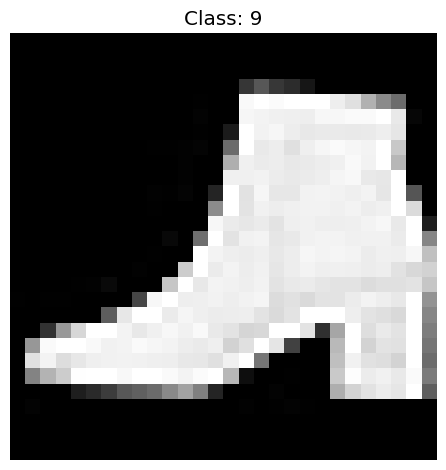

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
Class	Prediction
0	0.00000
1	0.00000
2	0.00000
3	0.00000
4	0.00000
5	0.00000
6	0.00000
7	0.00000
8	0.00000
9	1.00000
Result of prediction: 9



In [ ]:
def predict_fashion(image, model_path = 'model_fashion.keras', labels_path = 'labels_fashion'):
  model = load_model(model_path)
  lb = pickle.loads(open(labels_path, 'rb').read())

  img = image.reshape(-1, 28, 28, 1)

  preds = model.predict(img)
  preds = preds[0]
  print('Class\tPrediction')
  for i in range(len(preds)):
    print(f'{lb.classes_[i]}\t{preds[i]:.5f}')
  print(f'Result of prediction: {preds.argmax()}\n')

# Ваш код
num = np.random.randint(0, 9999, size=10)

for i in range(1, 10):
    plt.plot()
    plt.title(f'Class: {test_Y[num[i]].argmax()}')
    plt.imshow(testX[num[i]], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    predict_fashion(test_X[num[i]])


# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [ ]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile
import random
from imutils import paths

# Путь к ZIP-архиву
zip_path = '/content/drive/MyDrive/animals.zip'

# Временная директория для извлечения файлов
extract_path = '/content/animals_extracted'

# Создаем временный каталог, если он не существует
os.makedirs(extract_path, exist_ok=True)

# Словарь для переименования папок
translate = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "scoiattolo": "squirrel",
    "ragno": "spider"
}

# Открываем ZIP-архив
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Получаем список всех файлов в архиве
    file_list = zip_ref.namelist()

    # Фильтруем файлы, которые находятся в папке raw-img
    raw_img_files = [f for f in file_list if f.startswith('raw-img/') and not f.endswith('/')]

    # Обрабатываем каждый файл
    for file in raw_img_files:
        # Извлекаем имя папки (животного) из пути
        folder_name = file.split('/')[1]  # Например, "cane", "gatto" и т.д.

        # Переименовываем папку, если это необходимо
        if folder_name in translate:
            new_folder_name = translate[folder_name]
        else:
            new_folder_name = folder_name  # Если папка не в словаре, оставляем как есть

        # Создаем папку для животного, если она еще не существует
        animal_folder_path = os.path.join(extract_path, new_folder_name)
        os.makedirs(animal_folder_path, exist_ok=True)

        # Извлекаем файл в соответствующую папку
        zip_ref.extract(file, animal_folder_path)
        print(f"Extracted '{file}' to '{animal_folder_path}'")

# Список для хранения путей к изображениям
imagesPath = []

# Проходим по всем папкам с животными
for animal_folder in os.listdir(extract_path):
    folder_path = os.path.join(extract_path, animal_folder)

    # Получаем список файлов в папке
    files = list(paths.list_images(folder_path))

    # Ограничиваем количество файлов до 200
    if len(files) > 400:
        files = files[:400]

    # Добавляем файлы в общий список
    imagesPath.extend(files)

# Перемешиваем список путей к изображениям
random.shuffle(imagesPath)

# Теперь imagesPath содержит пути к 200 файлам из каждой папки
print(f"Total images: {len(imagesPath)}")

Выходные данные были обрезаны до нескольких последних строк (5000).
Extracted 'raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragn

In [ ]:
def load_images(imagePaths, compression_size = 32):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size))

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

data, labels = load_images(imagesPath, 64)

In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print(data.shape)

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.1)

lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

print(X_train.shape)
print(X_test.shape)

(4000, 64, 64, 3)
(3600, 64, 64, 3)
(400, 64, 64, 3)


In [ ]:
# Ваш код
model_my = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model_my.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,117,962 (8.08 MB)

 Trainable params: 2,117,962 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCH = 20

model_my.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model_my.fit(X_train, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2)

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.1332 - loss: 2.3028 - val_accuracy: 0.2569 - val_loss: 2.0424
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3172 - loss: 1.8819 - val_accuracy: 0.3667 - val_loss: 1.8567
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4652 - loss: 1.5425 - val_accuracy: 0.3903 - val_loss: 1.7220
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5764 - loss: 1.2731 - val_accuracy: 0.4319 - val_loss: 1.7437
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6856 - loss: 0.9602 - val_accuracy: 0.4389 - val_loss: 1.7963
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7615 - loss: 0.7473 - val_accuracy: 0.4486 - val_loss: 1.8611
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8498 - loss: 0.5320 - val_accuracy: 0.4389 - val_loss: 2.0130
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9116 - loss: 0.3485 - val_accuracy: 0.4556 - val_

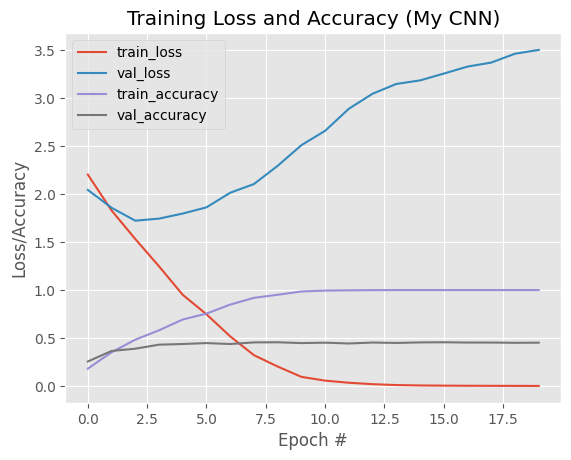

In [ ]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
model_my.save('overfitting_model_my.keras')

Начальные веса, похоже, были очень хорошими и в результате наличия большого количества эпох модель очень сильно переобучилась из-за чего на тренировочной выборке точность достигла порядка 100%, а на валидационной с каждой эпохой падала (и росли потери).

В качестве решения этой проблемы добавлю EarlyStoping, соберу модель и обучу ее заново.

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5)
checkpoint = ModelCheckpoint(filepath="best_model_my.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

model_my = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model_my.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model_my.fit(X_train, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.1410 - loss: 2.3334 - val_accuracy: 0.2444 - val_loss: 2.0649
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3185 - loss: 1.9043 - val_accuracy: 0.3653 - val_loss: 1.8289
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4554 - loss: 1.6308 - val_accuracy: 0.3694 - val_loss: 1.7853
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5364 - loss: 1.3770 - val_accuracy: 0.3764 - val_loss: 1.8149
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6297 - loss: 1.1212 - val_accuracy: 0.4319 - val_loss: 1.7151
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7398 - loss: 0.8207 - val_accuracy: 0.4208 - val_loss: 1.8884
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8173 - loss: 0.6152 - val_accuracy: 0.4458 - val_loss: 1.8143
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8905 - loss: 0.4131 - val_accuracy: 0.4486 - v

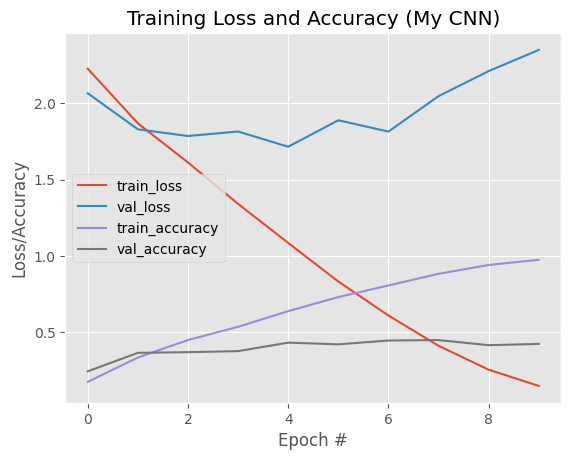

In [ ]:
import matplotlib.pyplot as plt

# Создаем массив N с правильной длиной
N = np.arange(0, len(history.history["loss"]))

# Настройка стиля графика
plt.style.use("ggplot")
plt.figure()

# Построение графиков
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")

# Настройка графика
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# Отображение графика
plt.show()

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [ ]:
# Ваш код

model_resnet_like = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_resnet_like.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,337,002 (5.10 MB)

 Trainable params: 1,337,002 (5.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCH = 20
checkpoint = ModelCheckpoint(filepath="best_model_resnet_like.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

model_resnet_like.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history_resnet_like = model_resnet_like.fit(X_train, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.1135 - loss: 2.3094 - val_accuracy: 0.1708 - val_loss: 2.2381
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1907 - loss: 2.2027 - val_accuracy: 0.2611 - val_loss: 2.1206
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2620 - loss: 2.0488 - val_accuracy: 0.2986 - val_loss: 1.9952
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2938 - loss: 1.9633 - val_accuracy: 0.3056 - val_loss: 1.9180
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3460 - loss: 1.8073 - val_accuracy: 0.3569 - val_loss: 1.8079
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4087 - loss: 1.6689 - val_accuracy: 0.3625 - val_loss: 1.7919
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4608 - loss: 1.5263 - val_accuracy: 0.4083 - val_loss: 1.6717
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4765 - loss: 1.4118 - val_accuracy: 0.3944 - 

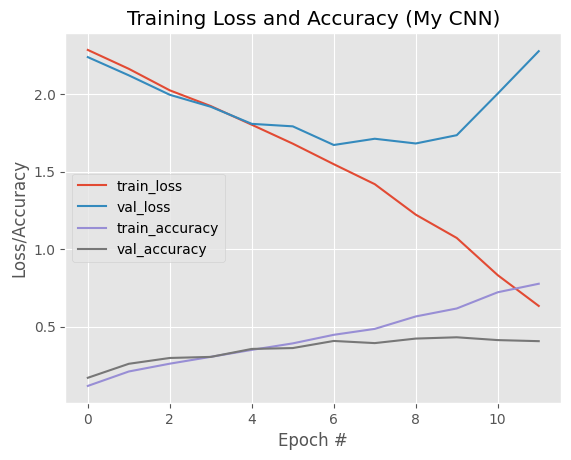

In [ ]:
N = np.arange(0, 12)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history_resnet_like.history["loss"], label="train_loss")
plt.plot(N, history_resnet_like.history["val_loss"], label="val_loss")
plt.plot(N, history_resnet_like.history["accuracy"], label="train_accuracy")
plt.plot(N, history_resnet_like.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 2.3. Сохраните полученные модели

In [ ]:
# Ваш код
# сохранены в процессе обучения с помощью чекпоинта

## 2.4. Загрузите обученную модель из прошлой практической работы



## 2.5. Сравните между собой точность всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

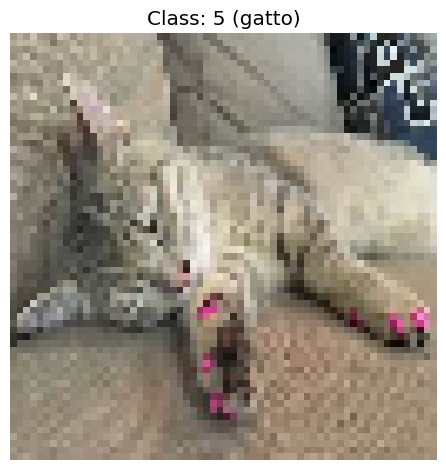

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
Class		Old_model	My_model	ResNet_like
cane	0.00075		0.00075		0.01278
cavallo	0.00691		0.00691		0.02522
elefante	0.02361		0.02361		0.01567
farfalla	0.00281		0.00281		0.02981
gallina	0.45015		0.45015		0.61329
gatto	0.01200		0.01200		0.02656
mucca	0.21671		0.21671		0.09655
pecora	0.17458		0.17458		0.06597
ragno	0.10004		0.10004		0.02537
scoiattolo	0.01243		0.01243		0.08877

Predicted Classes:
Old_model: gallina
My_model: gallina
ResNet_like: gallina

True Class: gatto


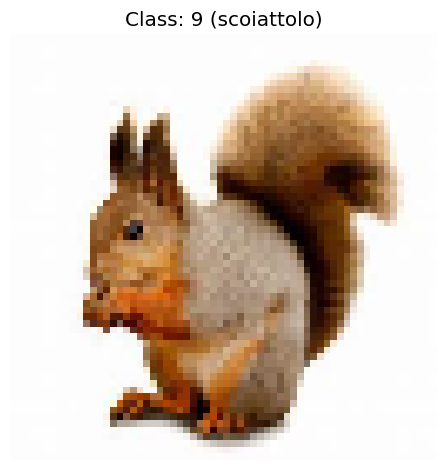

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
Class		Old_model	My_model	ResNet_like
cane	0.01738		0.01738		0.16239
cavallo	0.00074		0.00074		0.00941
elefante	0.00451		0.00451		0.00452
farfalla	0.00128		0.00128		0.00724
gallina	0.56536		0.56536		0.19541
gatto	0.04272		0.04272		0.26025
mucca	0.00054		0.00054		0.01799
pecora	0.00025		0.00025		0.01037
ragno	0.00001		0.00001		0.00154
scoiattolo	0.36721		0.36721		0.33088

Predicted Classes:
Old_model: gallina
My_model: gallina
ResNet_like: scoiattolo

True Class: scoiattolo


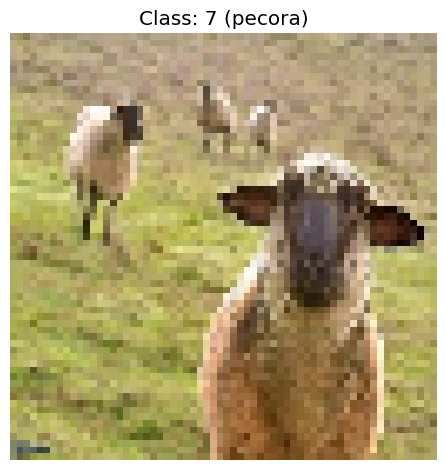

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
Class		Old_model	My_model	ResNet_like
cane	0.04879		0.04879		0.11309
cavallo	0.14509		0.14509		0.11162
elefante	0.00611		0.00611		0.02151
farfalla	0.00928		0.00928		0.01023
gallina	0.00907		0.00907		0.01446
gatto	0.00164		0.00164		0.02637
mucca	0.02964		0.02964		0.13812
pecora	0.72817		0.72817		0.45957
ragno	0.00716		0.00716		0.09545
scoiattolo	0.01504		0.01504		0.00959

Predicted Classes:
Old_model: pecora
My_model: pecora
ResNet_like: pecora

True Class: pecora


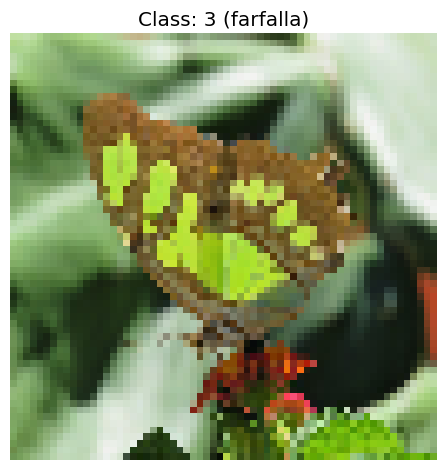

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
Class		Old_model	My_model	ResNet_like
cane	0.06167		0.06167		0.10684
cavallo	0.00002		0.00002		0.01154
elefante	0.00292		0.00292		0.01684
farfalla	0.35294		0.35294		0.11942
gallina	0.00022		0.00022		0.00668
gatto	0.52235		0.52235		0.07458
mucca	0.00179		0.00179		0.60314
pecora	0.05801		0.05801		0.02253
ragno	0.00007		0.00007		0.01685
scoiattolo	0.00001		0.00001		0.02157

Predicted Classes:
Old_model: gatto
My_model: gatto
ResNet_like: mucca

True Class: farfalla


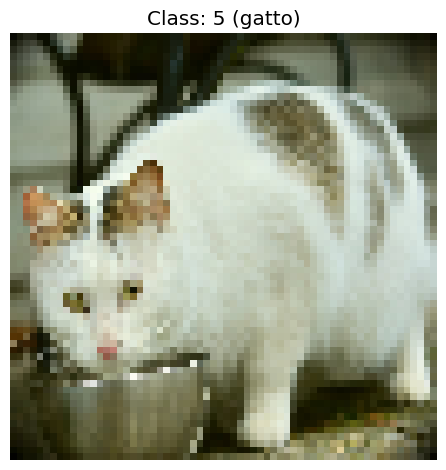

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
Class		Old_model	My_model	ResNet_like
cane	0.03632		0.03632		0.51713
cavallo	0.01594		0.01594		0.00579
elefante	0.00056		0.00056		0.00037
farfalla	0.00876		0.00876		0.00067
gallina	0.00146		0.00146		0.00265
gatto	0.46309		0.46309		0.09725
mucca	0.15542		0.15542		0.16830
pecora	0.30916		0.30916		0.20714
ragno	0.00096		0.00096		0.00004
scoiattolo	0.00833		0.00833		0.00067

Predicted Classes:
Old_model: gatto
My_model: gatto
ResNet_like: cane

True Class: gatto


In [ ]:
def predict_class(image, labels, true_class=None):
    # Загрузка моделей
    model_1 = load_model('/content/best_model_my.keras')  # Полносвязная модель
    model_2 = load_model('/content/best_model_my.keras')  # Сверточная модель
    model_3 = load_model('/content/best_model_resnet_like.keras')  # Сверточная модель

    # Подготовка данных для model_1 (ожидает 2D-тензор)
    img_flat = image.flatten()
    img_flat = img_flat.reshape((1, img_flat.shape[0]))

    # Подготовка данных для model_2 и model_3 (ожидают 4D-тензор)
    img = image.reshape(-1, 64, 64, 3)

    # Предсказания
    preds_1 = model_1.predict(img)  # Для полносвязной модели
    preds_1 = preds_1[0]
    preds_2 = model_2.predict(img)  # Для сверточной модели
    preds_2 = preds_2[0]
    preds_3 = model_3.predict(img)  # Для сверточной модели
    preds_3 = preds_3[0]

    # Определение предсказанных классов
    predicted_class_1 = labels.classes_[preds_1.argmax()]
    predicted_class_2 = labels.classes_[preds_2.argmax()]
    predicted_class_3 = labels.classes_[preds_3.argmax()]

    # Вывод результатов
    print('Class\t\tOld_model\tMy_model\tResNet_like')
    for i in range(len(preds_1)):
        print(f'{labels.classes_[i]}\t{preds_1[i]:.5f}\t\t{preds_2[i]:.5f}\t\t{preds_3[i]:.5f}')

    # Вывод предсказанных классов
    print('\nPredicted Classes:')
    print(f'Old_model: {predicted_class_1}')
    print(f'My_model: {predicted_class_2}')
    print(f'ResNet_like: {predicted_class_3}')

    # Если передан правильный класс, выводим его
    if true_class is not None:
        true_class_name = labels.classes_[true_class]
        print(f'\nTrue Class: {true_class_name}')

# Генерация случайных индексов в пределах размера X_test
num = np.random.randint(0, len(X_test), size=5)

# Визуализация и предсказание для 20 случайных изображений
for i in range(0, 5):
    image_show = X_test[num[i]]
    true_class = Y_test[num[i]].argmax()  # Получаем правильный класс
    plt.plot()
    plt.title(f'Class: {true_class} ({lb.classes_[true_class]})')
    plt.imshow(image_show[:, :, ::-1])  # Отображение изображения
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    predict_class(X_test[num[i]], lb, true_class)

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

In [ ]:
train.shape

Сейчас изображение - это вектор, имеющий размерность 4096.

In [ ]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

### 3.1.2. Отрисуйте несколько примеров

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [ ]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
X_train.shape

Вот один пример обучающей пары.

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [ ]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

## 3.2. Создайте архитектуру для этой задачи

In [ ]:
# Ваш код здесь
model_rec = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 64, 1)),
    MaxPooling2D((2,2), strides=2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),

    Dense(2048, activation='sigmoid'),
])

model_rec.summary()

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [ ]:
# Ваш код здесь
model_rec.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
# Ваш код здесь
EPOCH = 100

checkpoint = ModelCheckpoint(filepath="best_model_rec.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

history_rec = model_rec.fit(X_train, y_train_n, batch_size=32, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

## 3.5. Сделайте предсказания на тестовых данных

In [ ]:
# Ваш код здесь
preds = model_rec.predict(X_test, batch_size=10)

## 3.6. Посчитайте метрику качества на тестовых данных

In [ ]:
# Ваш код здесь

from sklearn.metrics import mean_squared_error

mean_squared_error(preds, y_test_n)

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [ ]:
preds.shape

In [ ]:
# Ваш код здесь
pred_test = preds.reshape(preds.shape[0], 32, 64)

Отрисуйте все предсказания.

In [ ]:
# Пример кода:

n_faces = 10
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(10):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title='pred faces')
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )